In [ ]:
import pandas as pd

df = pd.read_csv("/content/btc_usd.csv")

df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,314.2489929199219,320.43499755859375,314.00299072265625,320.43499755859375,8036550
3,2015-01-02,315.0320129394531,315.8389892578125,313.56500244140625,314.0790100097656,7860650
4,2015-01-03,281.0820007324219,315.1499938964844,281.0820007324219,314.84600830078125,33054400


In [ ]:
import pandas as pd

df_raw = pd.read_csv("/content/btc_usd.csv")


if "Price" in df_raw.columns:
    df_raw = df_raw.rename(columns={"Price": "Date"})


df_clean = df_raw[df_raw["Date"].str.match(r"\d{4}-\d{2}-\d{2}", na=False)]


df_clean["Date"] = pd.to_datetime(df_clean["Date"])


for col in df_clean.columns:
    if col != "Date":
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

df_clean = df_clean.set_index("Date")

df_clean.head()


/tmp/ipython-input-4183189242.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Date"] = pd.to_datetime(df_clean["Date"])
/tmp/ipython-input-4183189242.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.style.use("seaborn-v0_8")

df = df_clean.copy()
ts = df["Close"].astype(float)

In [ ]:
train = ts.iloc[:-30]
test = ts.iloc[-30:]

In [ ]:
model = ARIMA(train, order=(5,1,2))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3623
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -29909.797
Date:                Wed, 26 Nov 2025   AIC                          59835.594
Time:                        09:06:52   BIC                          59885.153
Sample:                    01-01-2015   HQIC                         59853.250
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8057      0.037     21.940      0.000       0.734       0.878
ar.L2         -0.8233      0.033    -24.940      0.000      -0.888      -0.759
ar.L3         -0.0535      0.014     -3.744      0.0

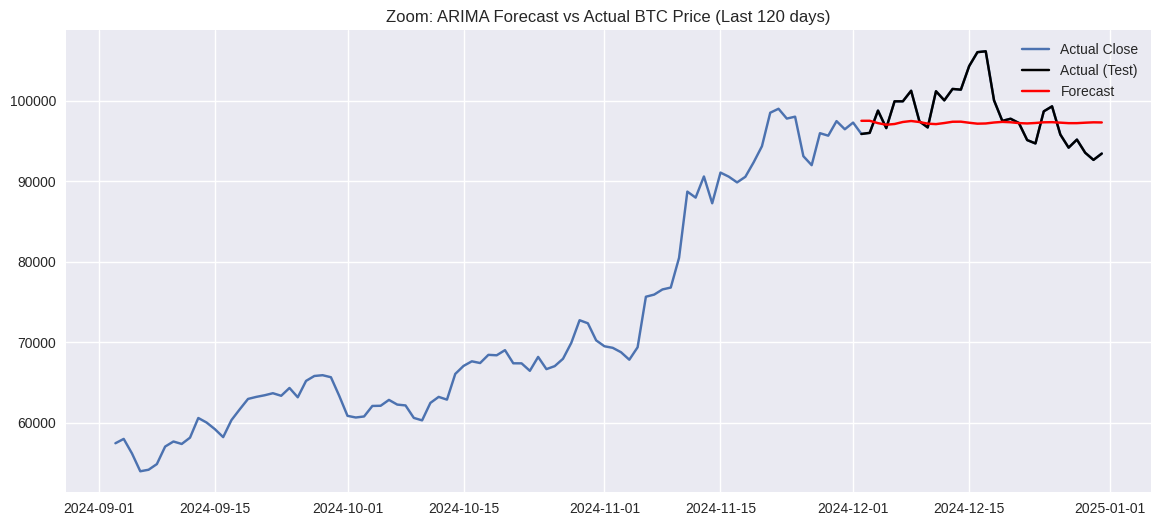

In [ ]:
forecast = model_fit.forecast(steps=30)
forecast.index = test.index

plt.figure(figsize=(14,6))
zoom_window = ts.iloc[-120:]

plt.plot(zoom_window.index, zoom_window, label="Actual Close")
plt.plot(test.index, test, label="Actual (Test)", color="black")
plt.plot(forecast.index, forecast, label="Forecast", color="red")

plt.title("Zoom: ARIMA Forecast vs Actual BTC Price (Last 120 days)")
plt.legend()
plt.show()



In [ ]:
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

mae, rmse

(2825.8041349406635, np.float64(3619.977541052765))

El modelo ARIMA captura la tendencia general del precio de Bitcoin.

No predice shocks abruptos (propio de activos altamente volátiles).

El RMSE indica el rango promedio de error entre predicciones y valores reales.

Para activos financieros, modelos más complejos (LSTM, Prophet, o modelos híbridos) generalmente funcionan mejor, pero ARIMA es un excelente punto de partida para series temporales.